<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Introduction to python</center></h2>

In [1]:
# This is just magic :)
%matplotlib inline

# Import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Demo: classification

In this notebook we will consider several very simple applications of machine learning and data analysis techniques. The first example is hand-written digits recognition.  

<center><img src="img/mnist.png" width=800></center>

# Load Data

Download and read MNIST sample of hand-written digits. Train sample contains 60k monochrome images with size of 28x28 pixels with values in range [0, 255]. There are 10 classes of the digits: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.

In [2]:
# Run it if you have problems with the next cell
# !pip install keras tensorflow

In [3]:
# Import dataset tool
from keras.datasets import mnist

# Download MNIST dataset
# X - imades, y - true labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [5]:
# An image representation
X_train[0] # one omage with 28 x 28 pixels with values in range [0, 255]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Labels representation
y_train[:10] # the first 10 labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Plot Images

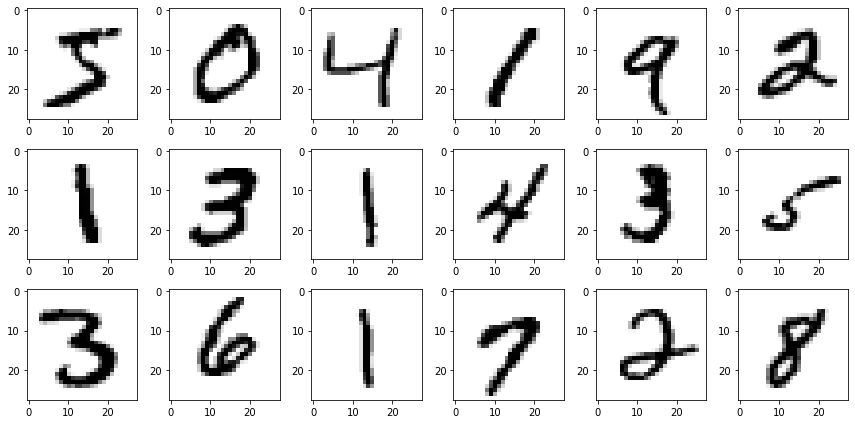

In [7]:
plt.figure(figsize=(12,6))  # Create a figure oject with size of (12, 6)
x, y = 6, 3                 # Define number of rows and columns in the figure
for i in range(x*y):        # Plot figures one-by-one
    plt.subplot(y, x, i+1)  # Create subplot for one image in the figure
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')  # Plot the image
plt.tight_layout()          # Define images layout (optional)
plt.show()                  # Show the figure

# Data Preprocessing

In [8]:
# Scale X
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# Reshape input data to make it ready for the further analysis. 
# We need to transform 28x28 images into vectors of 784 pixels
X_train_prep = X_train.reshape((len(X_train), -1, ))
X_test_prep = X_test.reshape((len(X_test), -1, ))

print('(Old shape) X_train:    ', X_train.shape)
print('(New shape) X_train_prep: ', X_train_prep.shape)

(Old shape) X_train:     (60000, 28, 28)
(New shape) X_train_prep:  (60000, 784)


# Classification

Select a classifier and train it to recognise the digits.

In [9]:
# Import a classifier from scikit-learn library https://scikit-learn.org
from sklearn.linear_model import LogisticRegression

# Define a classifier
classifier = LogisticRegression(solver='lbfgs', multi_class='ovr', n_jobs=-1)

# Train the classifier to recognize the digits
classifier.fit(X_train_prep[:1000], y_train[:1000]) # used the first 1000 images

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Test the Classifier

In [10]:
# Predict class probabilities for all images
y_test_pred_probas = classifier.predict_proba(X_test_prep)

# Show predicted probas for 2 images
y_test_pred_probas[:2]

array([[1.35378106e-03, 1.51433448e-07, 9.06640220e-03, 6.34212132e-03,
        1.47308346e-04, 3.73413083e-04, 7.26836400e-07, 9.81047609e-01,
        2.81746485e-04, 1.38673987e-03],
       [1.00520845e-02, 6.73680578e-06, 2.58816795e-01, 2.82237950e-02,
        7.65869678e-08, 2.08750497e-02, 6.81493410e-01, 4.93322215e-09,
        2.22240319e-04, 3.09806569e-04]])

In [11]:
# Predict labels for all images (class with the largest proba)
y_test_pred_classes = classifier.predict(X_test_prep)

# Show predicted classes for 10 images
y_test_pred_classes[:10]

array([7, 6, 1, 0, 4, 1, 4, 9, 2, 9], dtype=uint8)

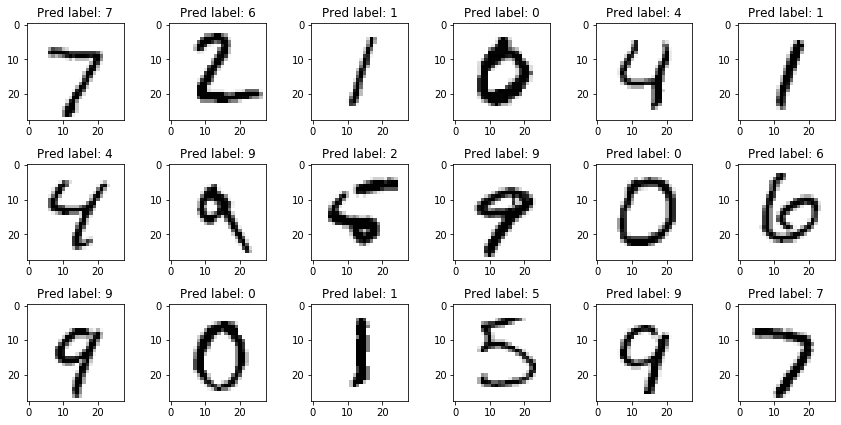

In [12]:
# Show several examples

plt.figure(figsize=(12,6))  # Create a figure oject with size of (12, 6)
x, y = 6, 3                 # Define number of rows and columns in the figure
for i in range(x*y):        # Plot figures one-by-one
    plt.subplot(y, x, i+1)  # Create subplot for one image in the figure
    plt.imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')  # Plot the image
    plt.title("Pred label: "+str(y_test_pred_classes[i]))               # Print predicted label
plt.tight_layout()          # Define images layout (optional)
plt.show()                  # Show the figure

In [13]:
# Calculate the total quality

# Import quality metric function
from sklearn.metrics import accuracy_score

# Calculate quality of the classifier
acc = accuracy_score(y_test, y_test_pred_classes)
print("Test accuracy: ", np.round(acc * 100, 2), "% of correct answers")

Test accuracy:  86.12 % of correct answers


---

# Demo: regression

## Create dataset

In [14]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 200).reshape(-1, 1)
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

## Display data

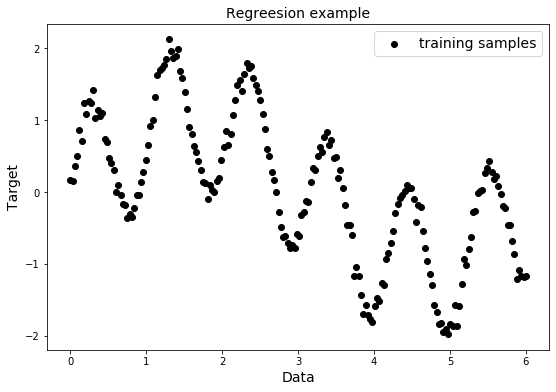

In [15]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, c="k", label="training samples")
plt.xlabel("Data", size=14)
plt.ylabel("Target", size=14)
plt.title("Regreesion example", size=14)
plt.legend(fontsize=14)
plt.show()

## Split on train and test samples

In [16]:
# Take each even element
X_train = X[::2]
y_train = y[::2]

# Take each odd element
X_test = X[1::2]
y_test = y[1::2]

# Regresion

In [17]:
# Import a regressor from scikit-learn library
from sklearn.ensemble import RandomForestRegressor

# Define a regressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=6, n_jobs=-1)

# Train the regressor
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [18]:
# Predict values using the regressor
y_pred = regressor.predict(X_test)

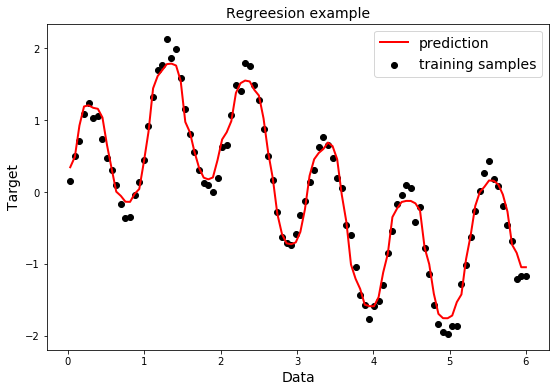

In [19]:
plt.figure(figsize=(9, 6))
plt.scatter(X_test, y_test, c="k", label="training samples")
plt.plot(X_test, y_pred, c="r", label="prediction", linewidth=2)
plt.xlabel("Data", size=14)
plt.ylabel("Target", size=14)
plt.title("Regreesion example", size=14)
plt.legend(fontsize=14)
plt.show()